In [1]:
# Actividad 3: Carlos Balbuena
# Percepcion Computacional

In [2]:
from skimage import exposure, img_as_float
from skimage import io, filters, morphology, color, measure, restoration
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img2000 = io.imread("actividad3/year2000.jpg", as_gray=True)
img2004 = io.imread("actividad3/year2004.jpg", as_gray=True)
img2008 = io.imread("actividad3/year2008.jpg", as_gray=True)
img2012 = io.imread("actividad3/year2012.jpg", as_gray=True)
img2016 = io.imread("actividad3/year2016.jpg", as_gray=True)

In [4]:
def calcular_area_deforestada(img, anho):
    # 1. Ajustar intensidad
    log_corrected = exposure.adjust_log(img, 2)
    # 2. Aplicar Segmentacion por Umbral
    thresh = filters.threshold_otsu(log_corrected)
    # 2.1 Obtener binario
    binary = log_corrected > thresh
    # 3. Mejorar aplicando algoritmos morfologicos
    cleaned = morphology.remove_small_objects(binary, min_size=64)
    # 3.1 Mostrar imagen
    plt.imshow(cleaned)
    plt.show()
    # 4. Contar pixeles y KM2
    contours = measure.find_contours(cleaned, 0.5)
    area_pixels = 0
    for contour in contours:
        mask = np.zeros_like(cleaned)
        mask[np.round(contour[:, 0]).astype(int), np.round(contour[:, 1]).astype(int)] = 1
        area_pixels += np.count_nonzero(mask)
    print('Área en píxeles {}:'.format(anho), area_pixels)
    print('Área en KM2 {}:'.format(anho), area_pixels * ( 20 / 51) )

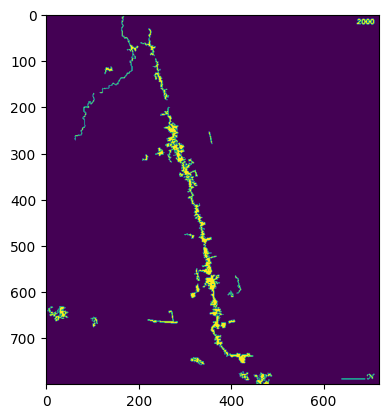

Área en píxeles 2000: 7335
Área en KM2 2000: 2876.470588235294


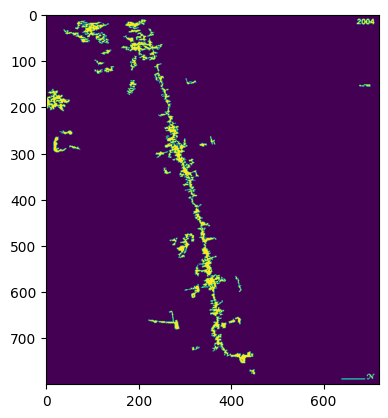

Área en píxeles 2004: 9973
Área en KM2 2004: 3910.9803921568628


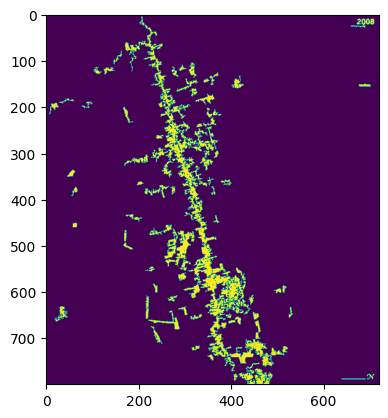

Área en píxeles 2008: 19584
Área en KM2 2008: 7680.0


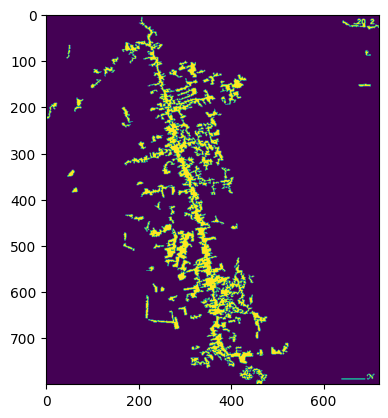

Área en píxeles 2012: 20170
Área en KM2 2012: 7909.803921568628


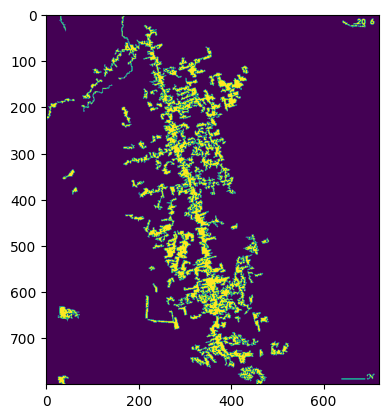

Área en píxeles 2016: 27223
Área en KM2 2016: 10675.686274509804


In [5]:
# Obtener Resultados
calcular_area_deforestada(img2000, '2000')
calcular_area_deforestada(img2004, '2004')
calcular_area_deforestada(img2008, '2008')
calcular_area_deforestada(img2012, '2012')
calcular_area_deforestada(img2016, '2016')